In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from copy import copy
sns.set()
from scipy import stats
import os

directory = os.fsencode("data")

   iteration  agent_type  unique_id  time_spent
0          0         Car          9         121
1          0  Pedestrian          7         256
2          0  Pedestrian         10         253
3          0  Pedestrian          8         263
4          0  Pedestrian         11         267


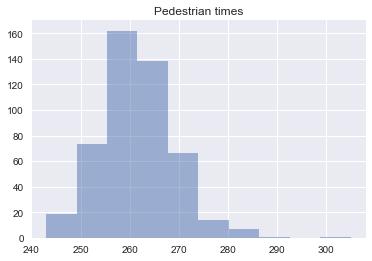

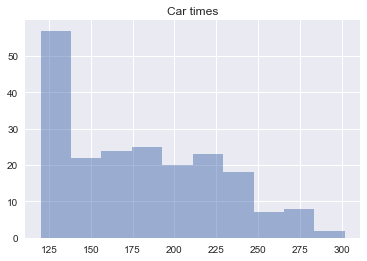

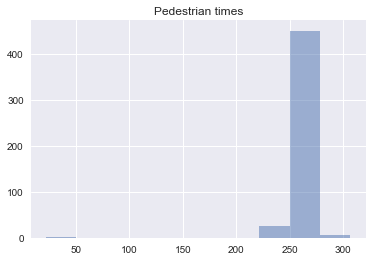

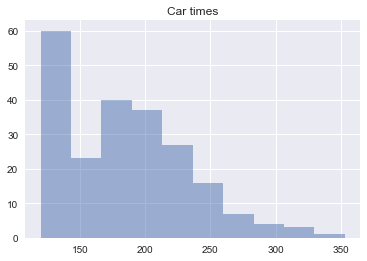

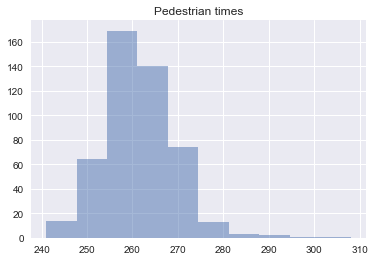

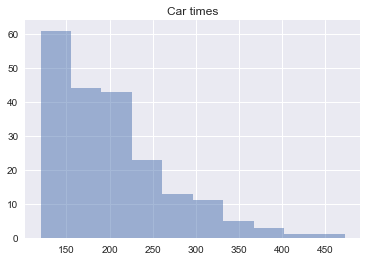

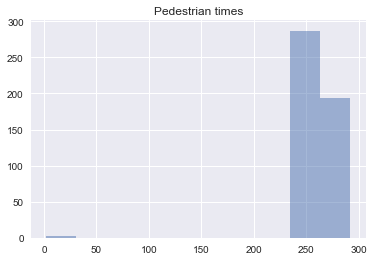

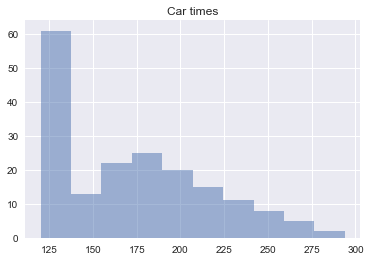

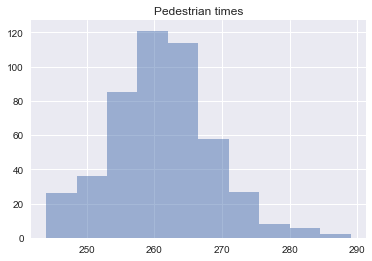

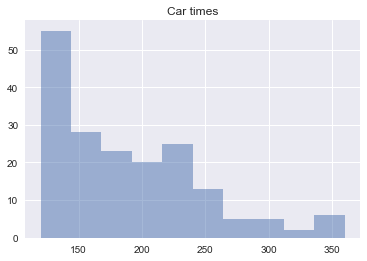

   iteration  agent_type  unique_id  time_spent
0          0         Car          9         120
1          0  Pedestrian          7         253
2          0  Pedestrian         10         246
3          0  Pedestrian          8         252
4          0         Car         25         187


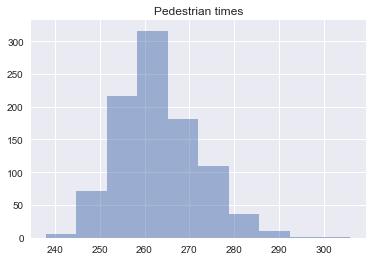

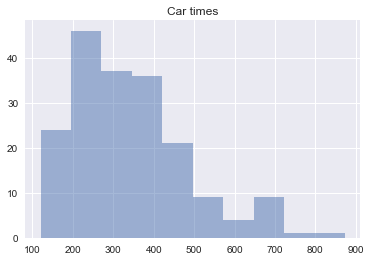

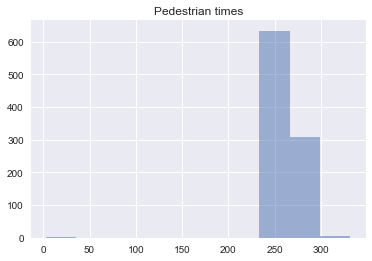

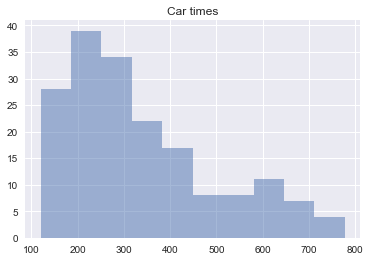

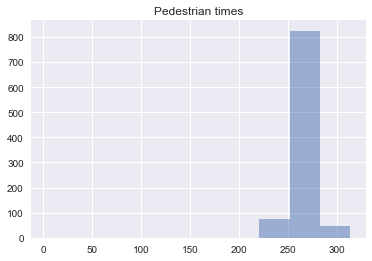

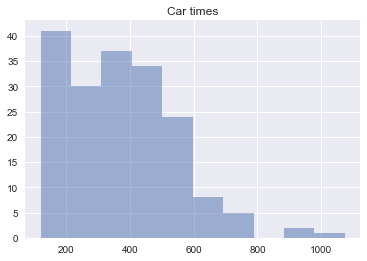

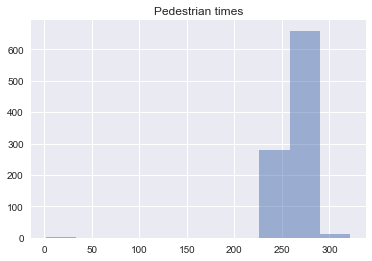

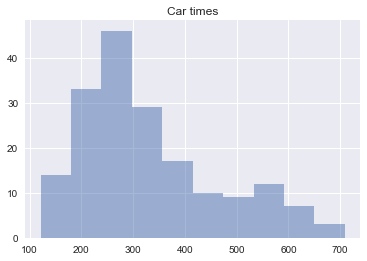

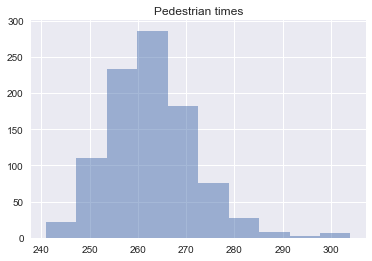

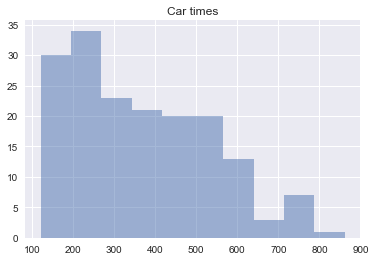

   iteration  agent_type  unique_id  time_spent
0          0         Car         11         121
1          0  Pedestrian          7         261
2          0  Pedestrian          9         264
3          0  Pedestrian          8         272
4          0  Pedestrian         10         261


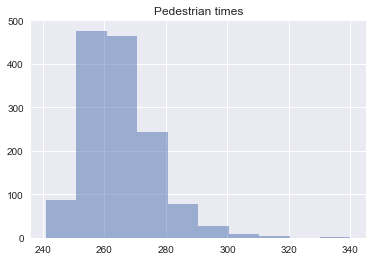

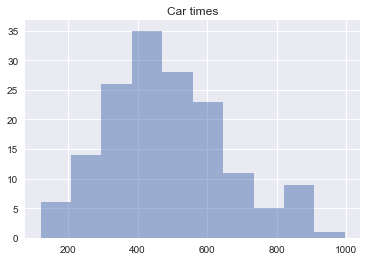

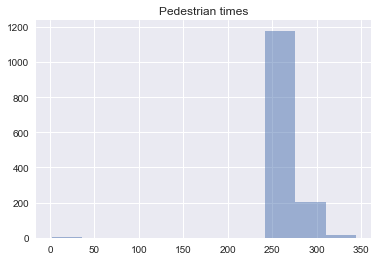

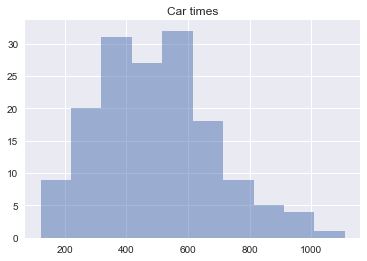

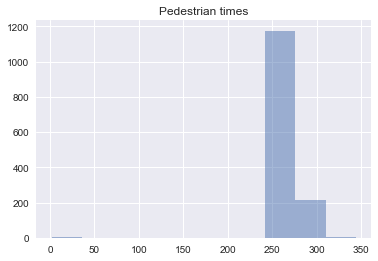

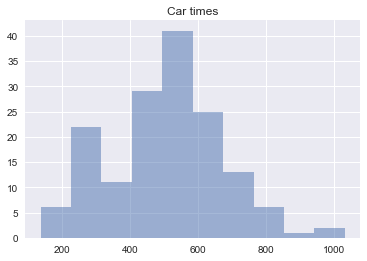

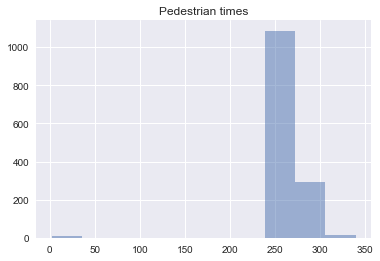

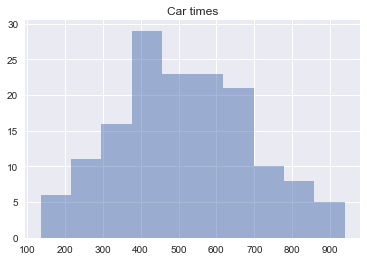

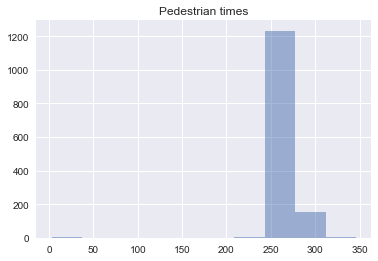

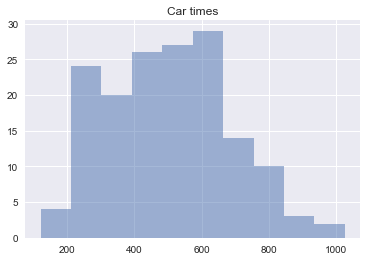

   iteration  agent_type  unique_id  time_spent
0          0         Car         16         121
1          0  Pedestrian          9         251
2          0  Pedestrian         10         245
3          0  Pedestrian         11         244
4          0  Pedestrian          8         259


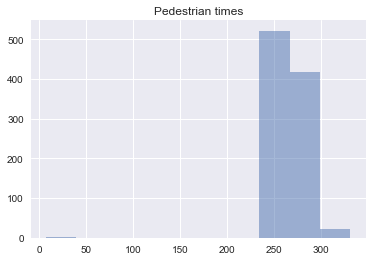

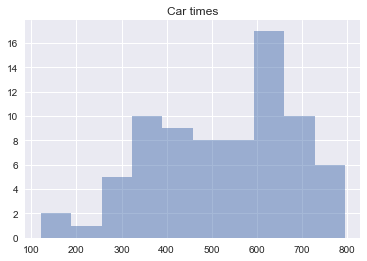

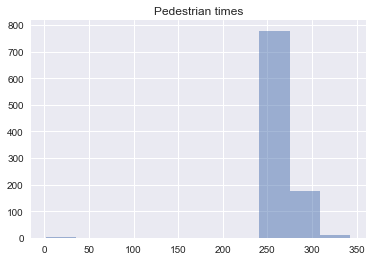

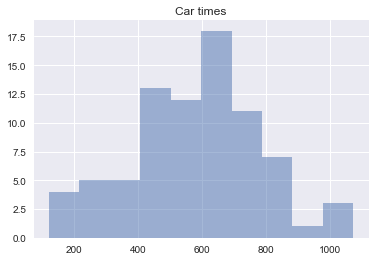

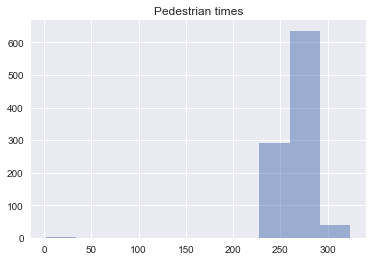

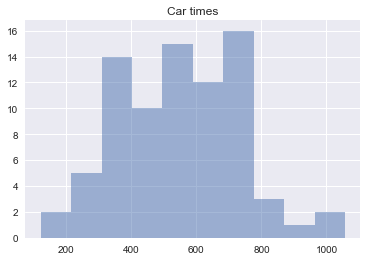

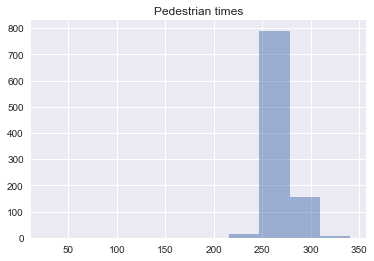

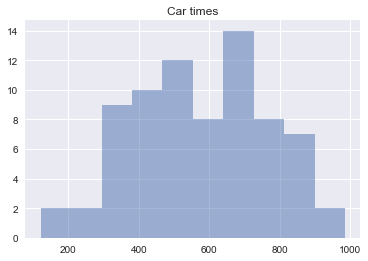

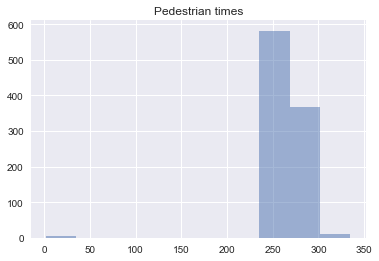

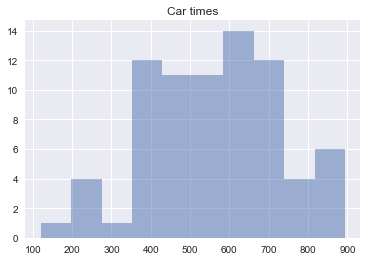

   iteration  agent_type  unique_id  time_spent
0          0         Car         15         120
1          0  Pedestrian         10         253
2          0  Pedestrian         12         248
3          0  Pedestrian          9         258
4          0  Pedestrian          8         268


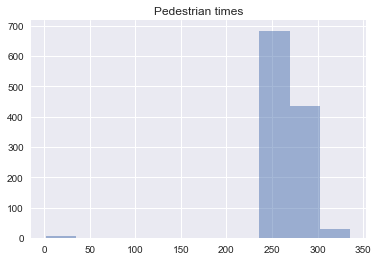

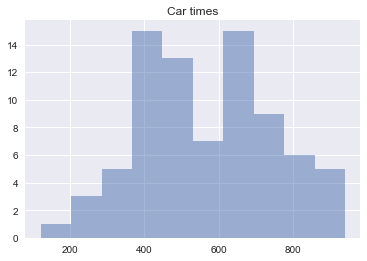

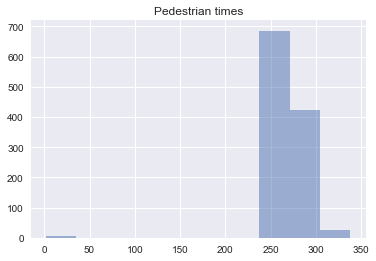

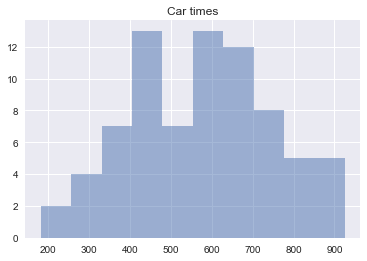

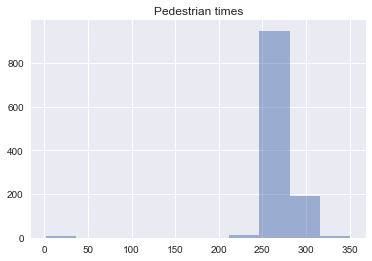

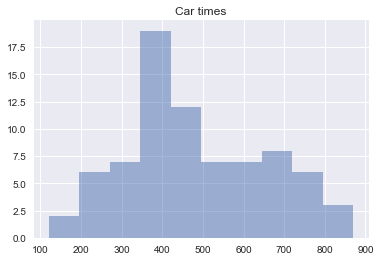

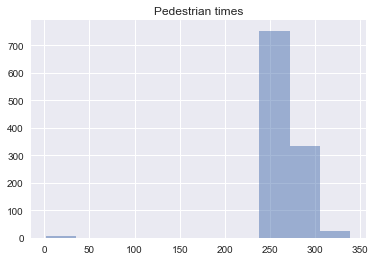

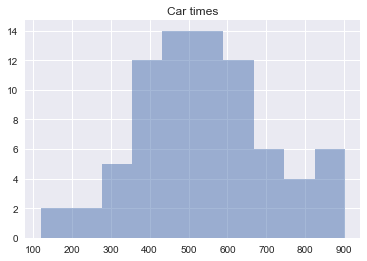

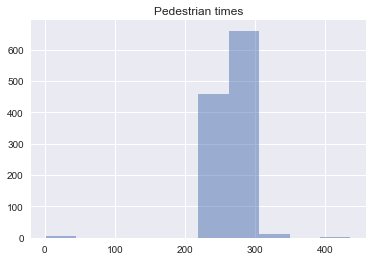

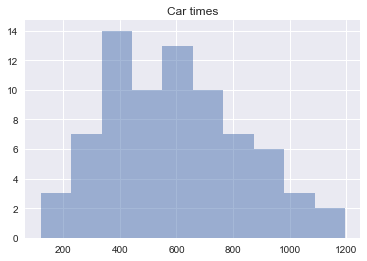

   iteration  agent_type  unique_id  time_spent
0          0  Pedestrian         10         248
1          0  Pedestrian          7         257
2          0  Pedestrian          9         252
3          0  Pedestrian          8         266
4          0  Pedestrian         12         257


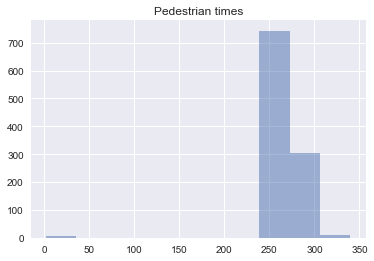

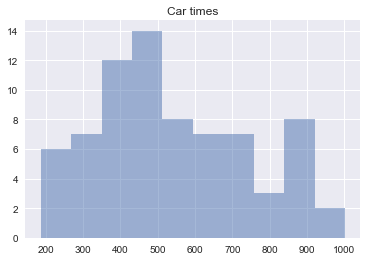

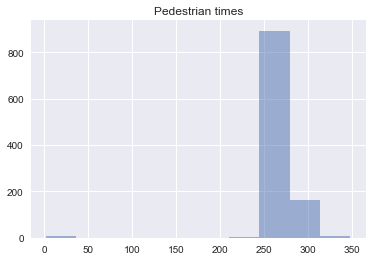

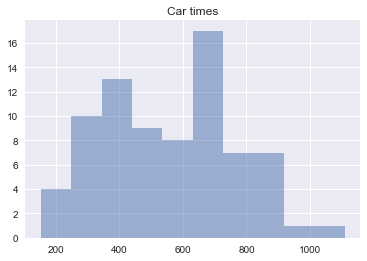

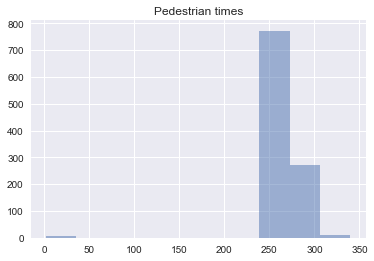

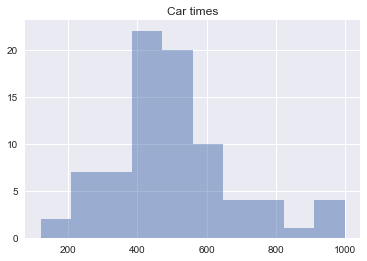

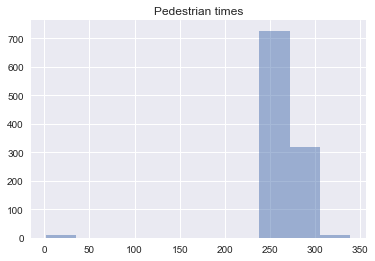

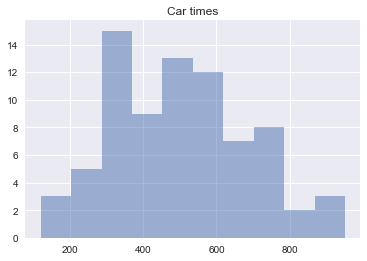

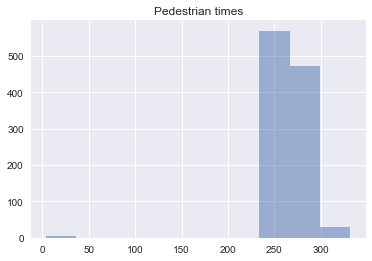

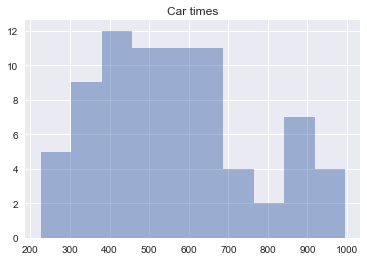

   iteration  agent_type  unique_id  time_spent
0          0         Car         10         121
1          0         Car         19         121
2          0  Pedestrian          8         257
3          0  Pedestrian         11         256
4          0  Pedestrian          9         272


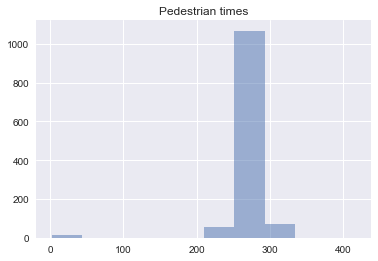

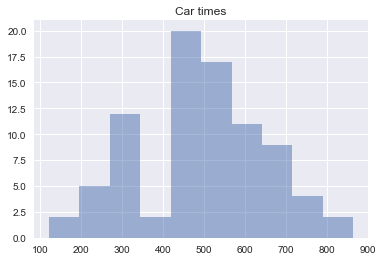

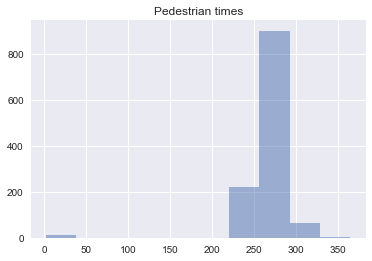

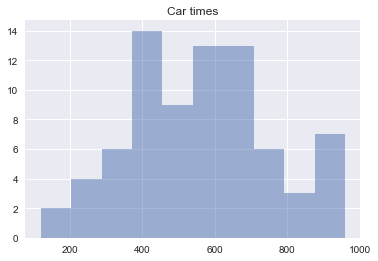

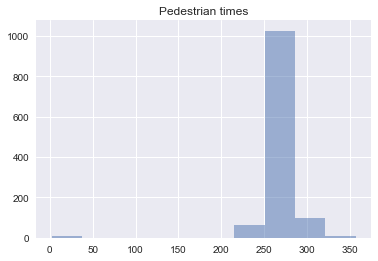

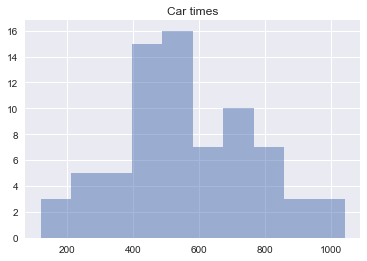

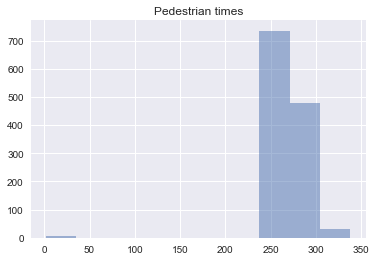

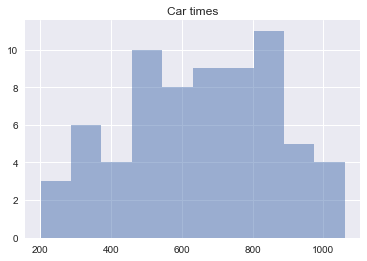

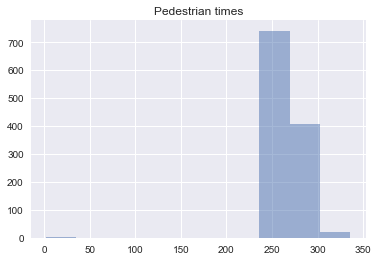

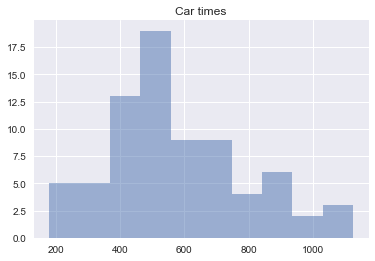

   iteration  agent_type  unique_id  time_spent
0          0  Pedestrian          8         262
1          0  Pedestrian          7         267
2          0  Pedestrian         12         261
3          0  Pedestrian         11         265
4          0  Pedestrian         15         252


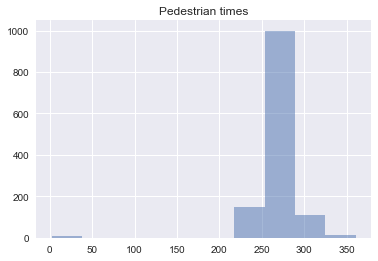

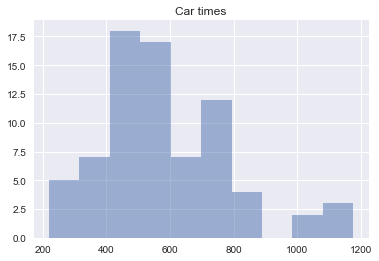

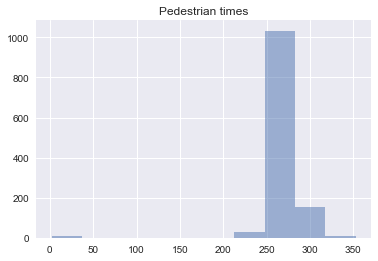

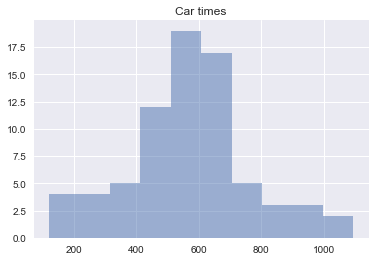

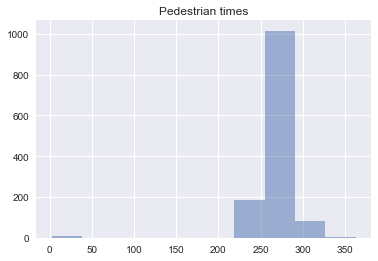

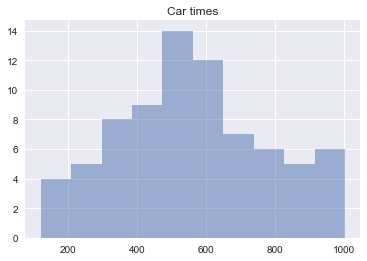

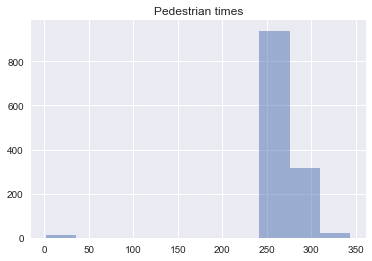

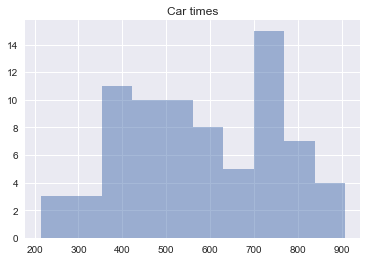

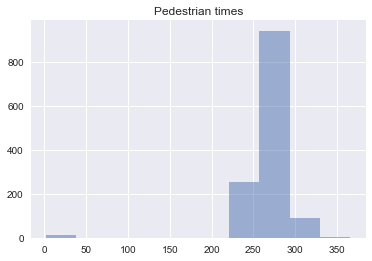

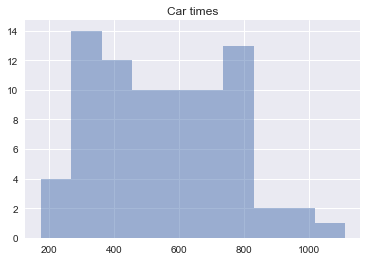

   iteration  agent_type  unique_id  time_spent
0          0         Car         18         120
1          0         Car         25         120
2          0         Car         28         121
3          0  Pedestrian          8         259
4          0  Pedestrian         11         257


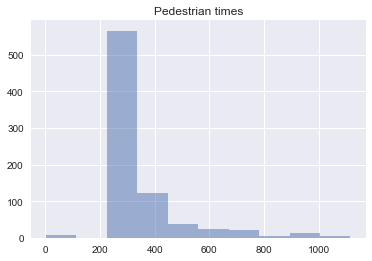

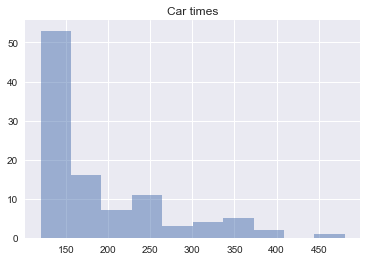

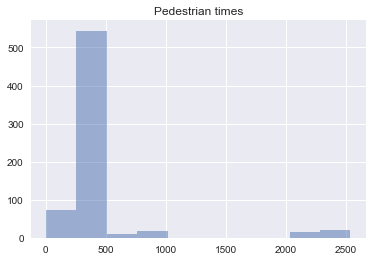

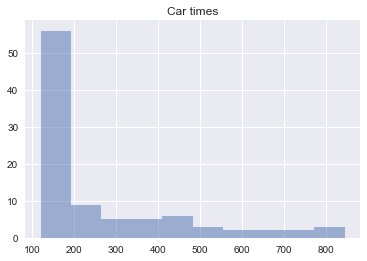

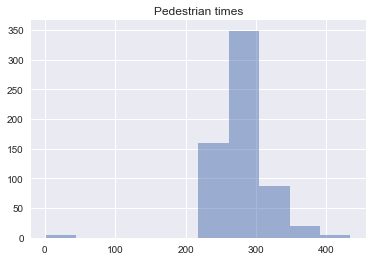

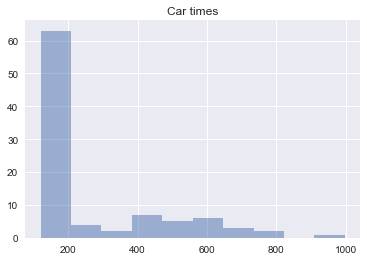

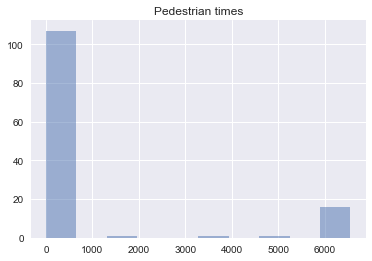

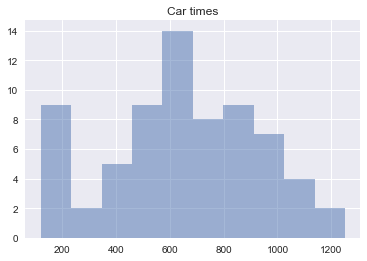

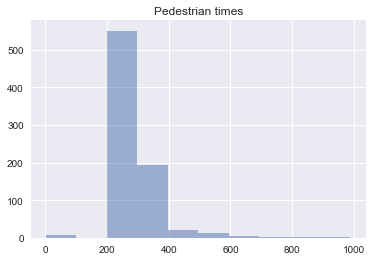

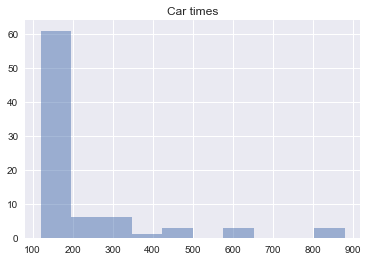

   iteration  agent_type  unique_id  time_spent
0          0  Pedestrian          8         258
1          0         Car         16         279
2          0         Car         56         131
3          0         Car         55         200
4          0  Pedestrian         20         296


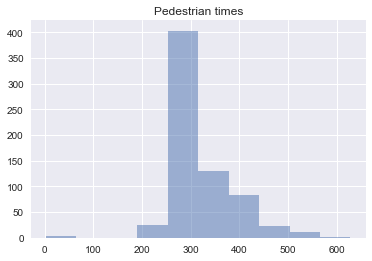

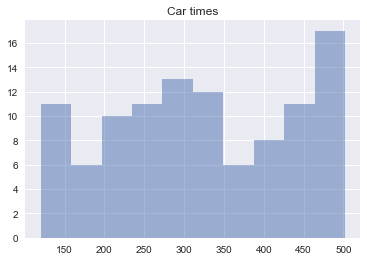

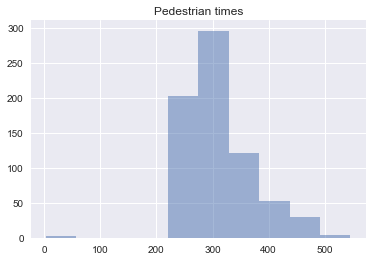

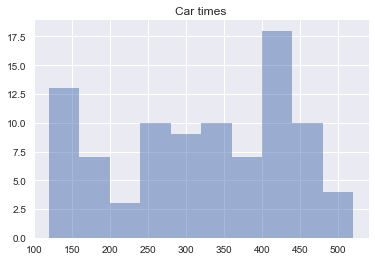

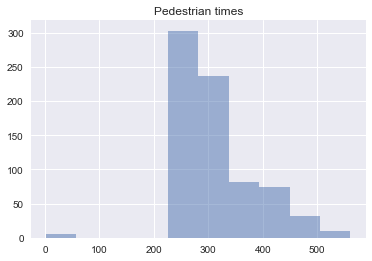

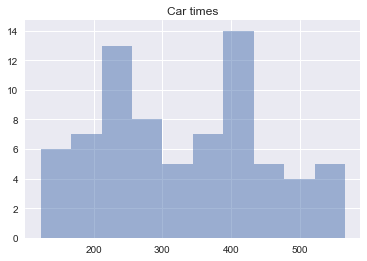

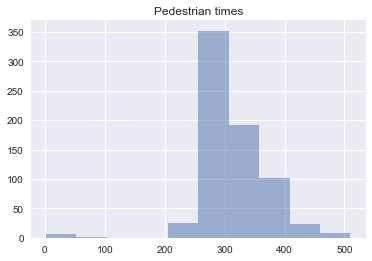

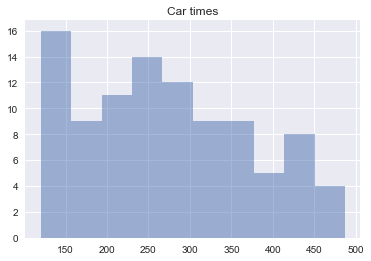

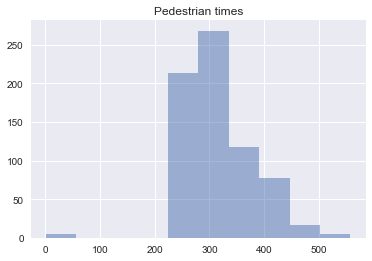

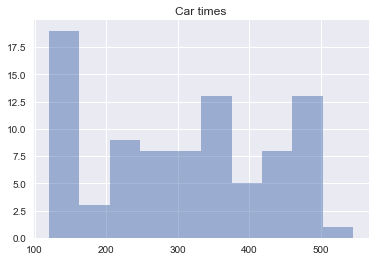

   iteration  agent_type  unique_id  time_spent
0          0         Car         15         121
1          0         Car         28         127
2          0  Pedestrian          7         279
3          0  Pedestrian          8         250
4          0  Pedestrian         12         246


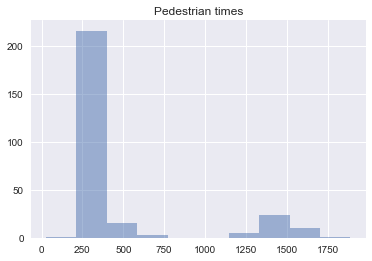

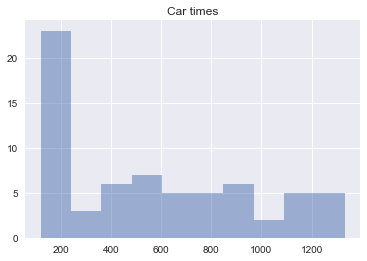

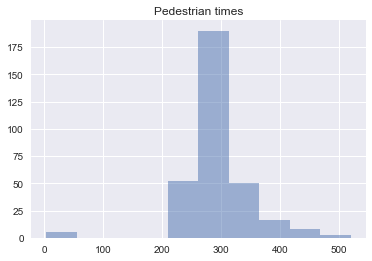

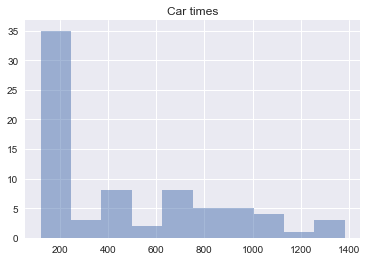

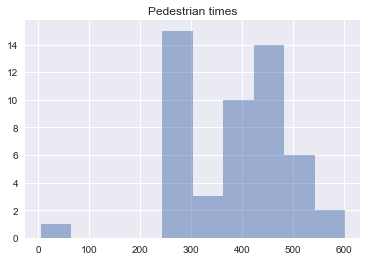

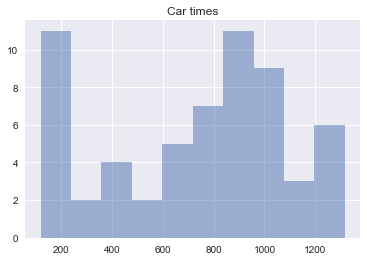

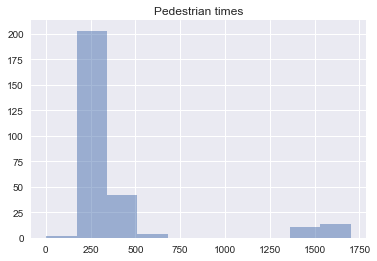

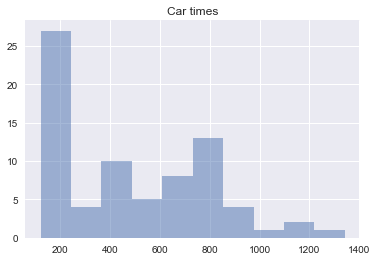

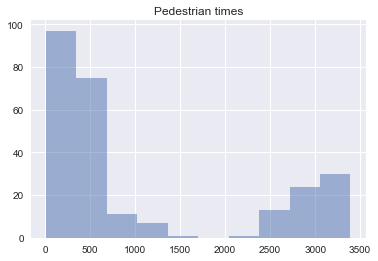

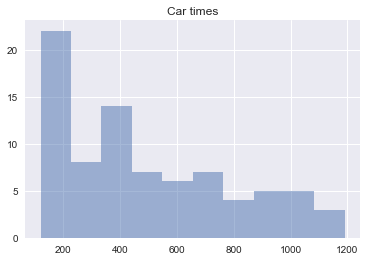

In [2]:
# make a list of lists with histogram information
peds_hists = []
cars_hists = []

if directory:

    for file in os.listdir(directory):
        filename = os.fsdecode(file)

        if filename.startswith("hist"):
            df = pd.read_csv("data/" + filename, header=4)
            
            print(df.head())
            for i in range(5):
                df_sim = df[df['iteration'] == i]
                peds = df_sim[df_sim['agent_type'] == "Pedestrian"]
                cars = df_sim[df_sim['agent_type'] == "Car"]
                plt.title('Pedestrian times')
                plt.hist(peds['time_spent'], alpha=0.5)
                plt.show()
                plt.title('Car times')
                plt.hist(cars['time_spent'], alpha=0.5)
                plt.show()
            

In [3]:
for pedes_times in peds_hists:
    plt.figure(figsize=(5,2))
    plt.xlabel("Time")
    plt.ylabel("Frequention")
    plt.hist(pedes_times, bins = 50)
    plt.show()

In [4]:
if directory:

    for file in os.listdir(directory):
        filename = os.fsdecode(file)

        if filename.startswith("info"):
                        
            df = pd.read_csv("data/" + filename, header=4)

for i in range(5):
    plt.figure(figsize=(5,5))
    plt.title("Very pretty seaborn graph with the amount of nerds/monkeys/whatever")
    plt.ylabel("Agent count")
    plt.xlabel("Time in simulation")

    df_sim = df[df['iteration'] == i]

    plt.plot(range(len(df_sim['car_count'])), df_sim['car_count'], label="Amount of cars")
    plt.plot(range(len(df_sim['car_count'])), df_sim['pedestrian_count'], label="Amount of pedestrians")
    plt.plot(range(len(df_sim['car_count'])), df_sim['mid_section_count'], label="Pedestrians on midsection")
    plt.legend()
    plt.show()
            
            


KeyboardInterrupt: 

In [54]:
# df = pd.read_csv("data/info_2019-01-31_15-45-07.csv", header=4)
# simultaneous data
# df = pd.read_csv("results/simultaneous/info_2019-01-31_17-02-18-D10.csv", header=4)
# df = pd.read_csv("results/simultaneous/info_2019-01-31_17-03-32-D20.csv", header=4)
# df = pd.read_csv("results/simultaneous/info_2019-01-31_17-04-31-D30.csv", header=4)

# reactive data
# df = pd.read_csv("results/non_simultaneous/info_2019-01-31_17-09-53-D10.csv", header=4)
df = pd.read_csv("results/non_simultaneous/info-D25.csv", header=4)


print(df.head())

sim_list = []
for i in range(50):
    df_sim = df[df['iteration'] == i]
    ped_list = []
    for i in df_sim['pedestrians_left']:
        ped_list.append(i)
    sim_list.append(ped_list)

   iteration  pedestrian_count  car_count  mid_section_count  \
0          0                 0          0                  0   
1          0                 1          0                  0   
2          0                 1          0                  0   
3          0                 1          0                  0   
4          0                 2          0                  0   

   pedestrians_left  cars_left  
0                 0          0  
1                 0          0  
2                 0          0  
3                 0          0  
4                 0          0  


In [55]:
batchMeans = []
for simulation in sim_list:
    batchMeans.append([(np.mean(simulation), np.std(simulation))])

# we need to do more than 1 simulation right?
accCheck(batchMeans, 50)

(0.05694857142857142,
 0.0045910969744246775,
 0.022346252471791103,
 (0.047950186709168244, 0.06594695614797459))

In [14]:
replicates = 50
# Create list of lists of pedestrians
sim_list = []
for i in range(replicates):
    df_sim = df[df['iteration'] == i]
    ped_list = []
    for i in df_sim['pedestrians_left']:
        ped_list.append(i)
    sim_list.append(ped_list)


# Create list of means
means = []
for simulation in sim_list:
    means.append(np.mean(simulation))
    
stats.norm.interval(.95, loc = np.mean(means), scale = np.std(means))
means

[0.06392307692307693,
 0.06492307692307692,
 0.067,
 0.06561538461538462,
 0.0663076923076923,
 0.06392307692307693,
 0.06492307692307692,
 0.06476923076923077,
 0.0673076923076923,
 0.06561538461538462,
 0.06569230769230769,
 0.06476923076923077,
 0.0663076923076923,
 0.064,
 0.06369230769230769,
 0.06653846153846153,
 0.06469230769230769,
 0.06553846153846153,
 0.06469230769230769,
 0.06476923076923077,
 0.06315384615384616,
 0.06384615384615384,
 0.06507692307692307,
 0.065,
 0.06392307692307693,
 0.0653076923076923,
 0.0683076923076923,
 0.06307692307692307,
 0.06784615384615385,
 0.06376923076923077,
 0.06615384615384616,
 0.06546153846153846,
 0.06438461538461539,
 0.06315384615384616,
 0.06707692307692308,
 0.0633076923076923,
 0.06623076923076923,
 0.06707692307692308,
 0.06584615384615385,
 0.066,
 0.0653076923076923,
 0.06615384615384616,
 0.06453846153846154,
 0.06338461538461539,
 0.06561538461538462,
 0.0643076923076923,
 0.06561538461538462,
 0.06546153846153846,
 0.06238

In [16]:
# TODO Analysis?
# df = pd.read_csv(filepath_info, header=4)

# # Create list of lists of pedestrians
# df_sim = df[df['iteration'] == 0]
# ped_list = []
# for i in df_sim['pedestrians_left']:
#     ped_list.append(i)
df_sim = df[df['iteration'] == 0]
df_sim['pedestrians_left'].mean()

data = [df[df['iteration'] == 0]['pedestrians_left'].mean()]
data

[0.06392307692307693]

In [34]:
len(sim_list[0])

13000

In [35]:
sum(sim_list[0])

831

In [36]:
sum(sim_list[1])

844

In [6]:
# ratio of unobserved data/total data
def createBatchData(ratio, amount, data):
    period = int(len(data) / amount)
#     print(period)
    intervalSize = int((ratio) * period)
#     print(period, intervalSize)
    dataBatchArray = []
    currentIndex = 0
    
    # Benedict, is that you?
    currentBatch = []

    for sample in data:

        if currentIndex >= intervalSize and currentIndex < period:
#             print(sample)
            currentBatch.append(sample)
            currentIndex = currentIndex + 1
            
            if currentIndex >= period:
                dataBatchArray.append((np.mean(currentBatch), np.std(currentBatch)))
                currentBatch = []
                currentIndex = 0
        else:
            currentIndex = currentIndex + 1
            

    return dataBatchArray

def accCheck(data, sample_size):
    
    means = []
    # calculate means for each batch -> then for each simulation
    for i in data:
        tempMeans = []
#         print("i", i)
        for j in i:
#             print('j', j)
            tempMeans.append(j[0])
        means.append(tempMeans)
    
    stds = []
    for i in data:
        tempStds = []
        for j in i:
            tempStds.append(j[1])
        stds.append(tempStds)
    
    # total mean
    stds = np.std(means)
    mean = np.mean(means)
    Za = 1.96
    # Get confidence bounds (mean +- z*S/sqrt(n))
    confidence = [mean-Za*(stds/(math.sqrt(sample_size))), mean+Za*(stds/(math.sqrt(sample_size)))]
    # Get accuracy (Z*sqrt(mean(1-mean)))/sqrt(n)
    accuracy = (Za*stds) / (sample_size **.5 * mean)
    test_CI = stats.norm.interval(.95, loc = mean, scale = stds)
    return mean, stds, accuracy, test_CI

In [ ]:
batchMeans = createBatchData(0.3, 30, carsTimes)

# we need to do more than 1 simulation right?
accCheck(batchMeans, 750)

In [ ]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [ ]:
import random
max([random.gauss(.134, .0342**2) for i in range(10000000)])

In [ ]:
print(max([random.gauss(.5, .3) for i in range(1000000)]))
print(min([random.gauss(.5, .3) for i in range(1000000)]))

In [ ]:
import matplotlib.pyplot as plt
plt.hist([max(0, min(1, random.gauss(0.5, 0.15))) for i in range(5000000)], bins = 30)
plt.show()

In [ ]:
import numpy as np
import math
1 / (1 + np.exp(10 - 0.25 * math.inf))

In [ ]:
neighbours = []
direction = 1
for i in range(16):
            neighbours.append(20 + ((-direction * 8) + i * (2.5 * 2)) * direction)
print(neighbours)

In [ ]:
neighbours = []
direction = -1
for i in range(16):
            neighbours.append(4 + ((-direction * 8) + i * (2.5 * 2)))
print(neighbours)

In [ ]:
neighbours = []
center = 8
for i in range(16):
    neighbours.append(50 + center - i * 2.5 * 2)
print(neighbours)

In [ ]:
neighbours = []
center = 8
for i in range(16):
    neighbours.append(20 - center + i * 2.5 * 2)
print(neighbours)